TASK目标：

通过引入卷积池化技术，改进性别识别精度。所用的数据跟前一个TASK保持一致，仍然是颜值打分数据。

本次TASK具体要求如下：

（1）对所有程序做详细注释，以确认你的理解正确；

（2）请详细计算并解释你所建立的CNN模型的参数个数，该练习帮助你理解模型的内在结构；

（3）将你所设计的CNN模型具体应用到颜值打分数据的性别识别上，看看你的精度如何！

<center> <h1> 卷积+池化：从卷积开始 </h1> </center>


<center> <h1> 卷积+池化 </h1> </center>

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/TwoHead.PNG" alt="drawing" width="800"/>

# 卷积


> 在图像处理中，针对图像的像素矩阵，卷积操作就是用一个卷积核来逐行逐列的扫描像素矩阵，并与像素矩阵做元素相乘，以此得到新的像素矩阵，这个过程称为卷积。

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化//convgif.gif" alt="drawing" width="400"/>

## 二维离散卷积

> 以3行3列的二维张量x和2行2列的二维张量K进行理解，其中K称为卷积核或滤波器

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/8-1.PNG" alt="drawing" width="400"/>


### full 卷积

> K沿着x按照先行后列的顺序移动，每移动到一个固定位置，对应位置的值相乘，然后求和，过程如下图

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/8-2.PNG" alt="drawing" width="600"/>



> full 卷积结果

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/8-3.PNG" alt="drawing" width="600"/>

### same卷积

> x与K进行same卷积，首先为K指定一个锚点，然后将锚点先行后列地移动到输入张量x的每一个位置处，对应位置相乘然后求和。卷积核K的高等于FH，宽等于FW，则锚点的位置一般用以下规则定义：(1) 如果FH为奇数，FW为奇数，锚点位置(FH-1)/2,(FW-1)/2; (2) 如果FH为奇数，FW为偶数，锚点位置(FH-1)/2,(FW-2)/2; (3) 如果FH为偶数，FW为奇数，锚点位置(FH-2)/2,(FW-1)/2; (4) 如果FH为偶数，FW为偶数，锚点位置(FH-2)/2,(FW-2)/2; (5) 最后的卷积结果和原始张量具有相同的维度

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/8-5.PNG" alt="drawing" width="600"/>



> same卷积结果

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/8-6.PNG" alt="drawing" width="600"/>

### valid卷积

> 从以上full卷积核same卷积的计算过程可知，如果卷积核K靠近x的边界，那么K就会有部分延伸到x外，导致访问到未定义的值，如果忽略边界，只考虑x能完全覆盖K值得情况（即K在x内移动），则该过程成为valid卷积。

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/8-7.PNG" alt="drawing" width="500"/>


### valid卷积结果

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/8-8.PNG" alt="drawing" width="500"/>


## 多深度的离散卷积

### 基本的多深度卷积

> 以1个3行3列2深度的三维张量x与1个2行2列2深度的三维卷积核k的valid卷积为例

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/8-16.PNG" alt="drawing" width="400"/>



> 两者分别在每一深度上进行二维valid卷积，然后再深度方向求和，过程如下图

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/8-17.PNG" alt="drawing" width="400"/>



> 最终的卷积结果如下图

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/8-18.PNG" alt="drawing" width="200"/>

### 一个张量与多个卷积核的卷积

> 以1个3行3列2深度的张量与3个2行2列2深度的卷积核卷积

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/8-19.PNG" alt="drawing" width="600"/>

# 思考问题：卷积与传统矩阵计算之间的关系？

 传统卷积运算是将卷积核以滑动窗口的方式在输入图上滑动，当前窗口内对应元素相乘然后求和得到结果，一个窗口一个结果。相乘然后求和恰好也是向量内积的计算方式，所以可以将每个窗口内的元素拉成向量，通过向量内积进行运算，多个窗口的向量放在一起就成了矩阵，每个卷积核也拉成向量，多个卷积核的向量排在一起也成了矩阵，于是，卷积运算转化成了矩阵运算。
 
 将卷积运算转化为矩阵乘法，从乘法和加法的运算次数上看，两者没什么差别，但是转化成矩阵后，运算时需要的数据被存在连续的内存上，这样访问速度大大提升.

<center> <h1> 卷积+池化：极大池化 </h1> </center>

<center> <h1> 卷积+池化 </h1> </center>

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/TwoHead.PNG" alt="drawing" width="800"/>

# 极大池化

> 池化（pooling）操作与卷积操作类似，取输入张量的每一个位置的矩形领域内值得最大值或平均值作为该位置的输出值，如果取的是最大值，则称为最大值池化，如果取的是平均值则称为平均值池化。pooling操作在图像处理中类似于减少样本量的处理。

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/pooling.jpg" alt="drawing" width="400"/>

## valid池化

> valid池化指滤波器只在张量内移动，以下图所示的x张量和滤波器为例，介绍valid最大池化过程

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/9-10.PNG" alt="drawing" width="600"/>


> 步长（stride）：即滤波器移动的步长，假设滤波器在张量内沿行和沿列的移动步长均为1，过程如下：

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/9-11.PNG" alt="drawing" width="600"/>

> 假设滤波器在张量内沿行和沿列的移动步长均为2，过程如下：

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/9-12.PNG" alt="drawing" width="600"/>

## 多深度张量的valid池化

> 以1个3行3列2深度的三维张量和2行2列的滤波器为例，其中滤波器沿行和沿列的步长均为1，具体过程如下图所示

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/9-15.PNG" alt="drawing" width="800"/>


> valid最大池化结果如下图所示 

<img src="F:/大三（上）/深度学习/TASK3.1：DL核心技术 - 卷积 + 池化/9-16.PNG" alt="drawing" width="200"/>

# 思考问题：还有没有其他池化方式？

平均池化

重叠池化

空间金字塔池化

# 设计自己的CNN模型 

CNN模型的参数个数

## 性别识别 

In [3]:
from PIL import Image
from glob import glob
import numpy as np
from keras.utils import to_categorical 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten,Input,Activation,Conv2D,MaxPooling2D,BatchNormalization
from keras import Model

In [5]:
import pandas as pd   #导入库
MasterFile=pd.read_csv('F:/大三（上）/深度学习/TASK2.1：AI可以为颜值打分/FaceScore.csv')
#读入参考文件 
print(MasterFile.shape)  #打印数组维度
MasterFile.head()        #打印前五个

(24, 2)


,Filename,Rating
0,ftw (1).jpg,4.083333
1,mtw (2).jpg,3.666667
2,mtw (3).jpg,1.916667
3,mtw (4).jpg,2.416667
4,mtw (5).jpg,3.166667


In [6]:
import numpy as np
from PIL import Image  

FileNames=MasterFile['Filename']
N=len(FileNames)
IMSIZE=128                #设置随机种子
X=np.zeros([N,IMSIZE,IMSIZE,3])  #返回一个和文件图片一致的用0填充的矩阵
for i in range(N):      #循环导入文件
    MyFile=FileNames[i]  
    Im=Image.open('F:/大三（上）/深度学习/TASK2.1：AI可以为颜值打分/image/'+MyFile)
    Im=Im.resize([IMSIZE,IMSIZE])  #图像的缩放
    Im=np.array(Im)/255     
    X[i,]=Im 

In [7]:
Y=np.zeros([N,2])
for i in range(N):
    gender=FileNames[i][0]
    if gender=='m':
        Y[i,0]=1
    else:
        Y[i,1]=1 

In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, Sequential, layers,metrics

In [31]:
from sklearn.model_selection import train_test_split   #构造训练集和测试集
X0,X1,Y0,Y1=train_test_split(X,Y,test_size=0.5,random_state=1)

<Figure size 432x288 with 0 Axes>

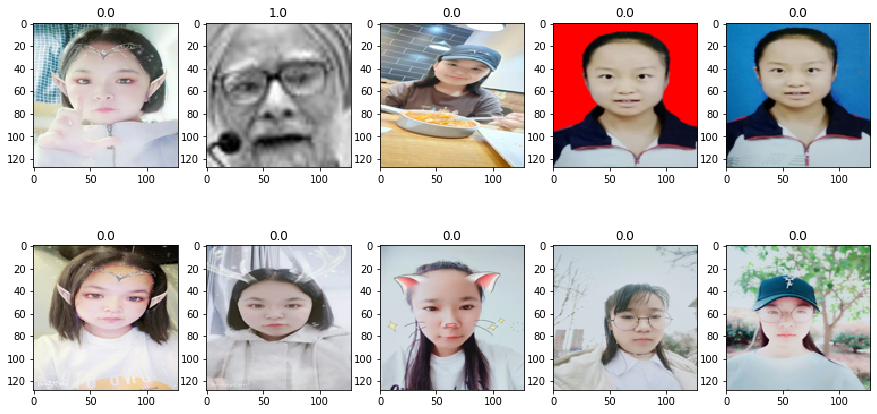

In [23]:
plt.figure()                     #导入绘图库
fig,ax=plt.subplots(2,5)        #2行5列
fig.set_figheight(7.5)           
fig.set_figwidth(15)
ax=ax.flatten()
for i in range(10):             #展示10张照片的性别
    ax[i].imshow(X0[i,:,:,:])
    ax[i].set_title(Y0[i,0])

In [32]:
imsize=128   
input_size=[imsize,imsize,3]
input_layer=Input(input_size)
x=input_layer
x=Conv2D(100,[2,2],padding = "same", activation = 'relu')(x) 
x = MaxPooling2D(pool_size = [2,2])(x) 
x=Conv2D(100,[2,2],padding = "same", activation = 'relu')(x) 
x = MaxPooling2D(pool_size = [2,2])(x) 
x=Conv2D(100,[2,2],padding = "same", activation = 'relu')(x) 
x = MaxPooling2D(pool_size = [2,2])(x) 
x=Flatten()(x)
x=Dense(10,activation='softmax')(x)
output_layer=tf.squeeze(x)
model=Model(input_layer,output_layer)
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 100)     1300      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 100)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 100)       40100     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 100)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 100)       40100     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 100)      

input_3 (InputLayer)

conv2d_6 (Conv2D) 

max_pooling2d_6 (MaxPooling2)

conv2d_7 (Conv2D)

max_pooling2d_7 (MaxPooling2)

conv2d_8 (Conv2D) 

max_pooling2d_8 (MaxPooling2) 

flatten_2 (Flatten)    平方

dense_2 (Dense)       密度

tf_op_layer_Squeeze (TensorF)

输入层为长度为128x128x3的矩阵，消耗了25600个参数，乘以10，再加上截距项，一共消耗了337510个参数.

In [44]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])

## 颜值打分

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAE568DE08>]],
      dtype=object)

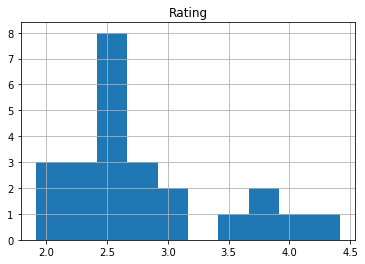

In [35]:
MasterFile.hist()  

In [36]:
for i in range(N):                     #循环导入文件
    MyFile=FileNames[i]
    Im=Image.open('F:/大三（上）/深度学习/TASK2.1：AI可以为颜值打分/image/'+MyFile)
    Im=Im.resize([IMSIZE,IMSIZE])     #图像的缩放
    Im=np.array(Im)/255               
    X[i,]=Im                          
YY=np.array(MasterFile['Rating']).reshape([N,1])    #构建数组形式
YY=(YY-np.mean(Y))/np.std(Y)                      #标准化每个变量

In [37]:
from sklearn.model_selection import train_test_split     #构造训练集和测试集
M0,M1,N0,N1=train_test_split(X,YY,test_size=0.5,random_state=0)

E:\Anaconda3\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

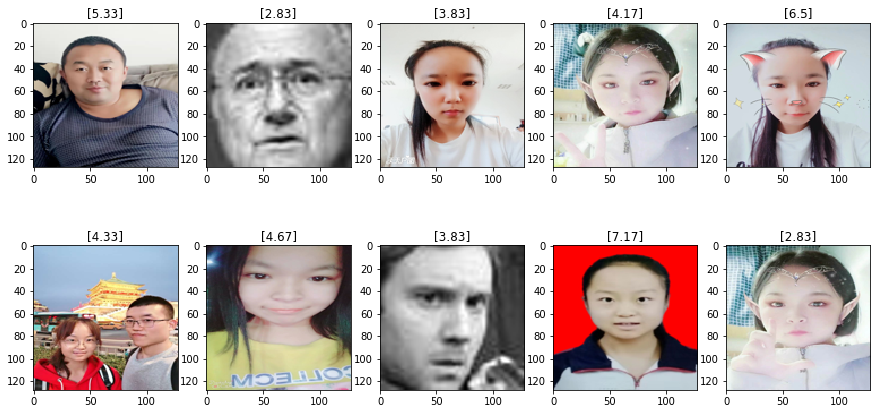

In [38]:
from matplotlib import pyplot as plt        #导入绘图库
plt.figure()                               #设置画布
fig,ax=plt.subplots(2,5)        
fig.set_figheight(7.5)
fig.set_figwidth(15)
ax=ax.flatten()
for i in range(10):              #展示10张照片的颜值
    ax[i].imshow(M0[i,:,:,:])
    ax[i].set_title(np.round(N0[i],2))

In [41]:
imsize1=128   
input_size1=[imsize1,imsize1,3]
input_layer1=Input(input_size1)
xx=input_layer1
xx=Conv2D(100,[2,2],padding = "same", activation = 'relu')(xx) 
xx = MaxPooling2D(pool_size = [2,2])(xx) 
xx=Conv2D(100,[2,2],padding = "same", activation = 'relu')(xx) 
xx = MaxPooling2D(pool_size = [2,2])(xx) 
xx=Conv2D(100,[2,2],padding = "same", activation = 'relu')(xx) 
xx = MaxPooling2D(pool_size = [2,2])(xx) 
xx=Flatten()(xx)
xx=Dense(10,activation='softmax')(xx)
output_layer1=xx
model1=Model(input_layer1,output_layer1)
model1.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 100)     1300      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 100)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 100)       40100     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 100)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 100)       40100     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 100)      

In [42]:
model1.compile(optimizer = Adam(0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])